In [1]:
import pandas as pd
import numpy as np 
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression 
import scipy, scipy.stats

def read_csv_file(path):
   df = pd.read_csv(path) 
   return(df) 

path = "./DeltaDS1.csv"

In [8]:
# imports
import pandas as pd
import matplotlib.pyplot as plt

# this allows plots to appear directly in the notebook
%matplotlib inline

In [2]:
table = read_csv_file(path)

In [3]:
table.head()

Unique Visitors  Average Page Depth  Flight Searches  Fare Change Error  \
0           695045                  19           540686                514   
1           747063                  19           557525                537   
2          1108106                  14           873056               1034   
3          1104659                  15           917531               1259   
4          1124734                  15           895169               1349   

    Revenue  
0  22403850  
1  22632654  
2  37367126  
3  42414291  
4  41818597

In [5]:
print table.head()

   Unique Visitors  Average Page Depth  Flight Searches  Fare Change Error  \
0           695045                  19           540686                514   
1           747063                  19           557525                537   
2          1108106                  14           873056               1034   
3          1104659                  15           917531               1259   
4          1124734                  15           895169               1349   

    Revenue  
0  22403850  
1  22632654  
2  37367126  
3  42414291  
4  41818597  


In [7]:
table.shape

(729, 5)

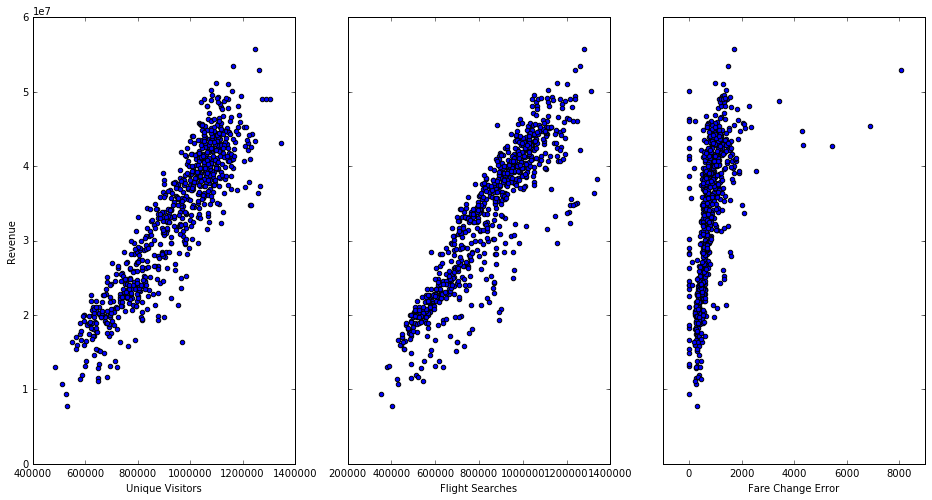

In [20]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
table.plot(kind='scatter', x='Unique Visitors', y='Revenue', ax=axs[0], figsize=(16, 8))
table.plot(kind='scatter', x='Flight Searches', y='Revenue', ax=axs[1], figsize=(16, 8))
table.plot(kind='scatter', x='Fare Change Error', y='Revenue', ax=axs[2], figsize=(16, 8))

In [4]:
print table.describe()

       Unique Visitors  Average Page Depth  Flight Searches  \
count       729.000000          729.000000       729.000000   
mean     936209.371742           10.582990    842155.670782   
std      173220.413485            1.379416    205079.734007   
min      484600.000000            8.000000    352162.000000   
25%      797245.000000            9.000000    684891.000000   
50%      973941.000000           11.000000    868606.000000   
75%     1072905.000000           11.000000    999448.000000   
max     1345858.000000           19.000000   1340024.000000   

       Fare Change Error          Revenue  
count          729.00000       729.000000  
mean           791.72428  33125832.005487  
std            608.82406   9607668.997537  
min              0.00000   7806047.000000  
25%            471.00000  24564590.000000  
50%            686.00000  34909738.000000  
75%            997.00000  40923118.000000  
max           8083.00000  55693374.000000  


# 1. Problem Statement
#### We are interested in seeing whether or not there is a relationship within the cross-sectional UCLA data 
#### to determine the relationship between and effect on admissions into the school and various application scores. We will measure if applicants with higher  
#### GRE, GPA and rank/prestige scores increase the chances of being admitted. The time-frame of the data is unknown, 
#### which limits relevancy of the outcomes.

#### Hypothesis: Students with higher ovdrall scores are more likely admitted into UCLA. However, other factors not included in 
#### the data set like time frame, gender, major, demographic and work experience which add weight to an applicant 
#### which would add more depth and breadth to the test results. 


# 2. What is the intended question you want to answer and what is the outcome?
#### Determine the association between the predictors gre, gpa, rank and admission entrance into UCLA. 
#### The outcome is admit 1 or 0, yes or no. 
#### The response variable, admit/don't admit, is a binary variabable.

# What are the predictors and covariates which determine admissions into UCLA?
#### By only using the data available, we can try to determine how admission varies based on GRE scores, 
#### GPA, and prestige/rank. 

# 3. What timeframe is this data relevant for?
#### Unknown, the data did not include a date. - Follow up on this?

# 4. What is the hypothesis about the students admitted into UCLA?
#### Predictors/covariates are components included in a total weighted score that the admissions board uses 
#### as a benchmark for admissions applications.
#### However, the prestige score is based on factors that are unknown and the admissions data does not include additional 
#### context about the student that also such as when they applied, their work experience, what program they applied for, 
#### recommendations and gender/background which may also influence how admissions 
#### builds the composition of the entering graduate class. 


# 5. Data Dictionary: UCLA Admissions 


Variable | Description | Type of Variable
---| ---| ---
Admit | Integer - Admissions outcome yes/no, binary whether a student admitted  | categorical
GRE | Integer - Integer Graduate exam score | continuous
GPA | Integer - Grade point average | continuous 
Rank Prestige | Integer - Alma Mater | categorical
 



## 6. What are the risks and assumptions of the data set?

#### Data is missing additional contextual and demographic data is lacking from the data set. This includes time 
#### frame/date the data was collected, what major or program they are applying for, what factors 
#### are included in creating the prestige score

## 7. Exploratory Analysis of UCLA data set: Loading Data, summary stats, regression and results


#### This dataset has a binary response yes or no (outcome, dependent) variable called admit. There are three predictor variables: gre, gpa and rank. The variables gre and gpa as continuous. The variable rank takes on the values 1 through 4. Institutions with a rank of 1 have the highest prestige, while those with a rank of 4 have the lowest. By using describe () below, we can see a high level overview of what our data set is.

In [ ]:
### Analysis Exploration Steps:
#### We have a data set who’s independent variables (predictors) are various scores, 
#### each candidate with an admit (0,1) has an associated set of predictors GRE, Rank/Prestige and GPA. 
#### By using pylab, statsmodel or even a logistal regression package one can test the differences 
#### between rank against admission and other hypotheses to understand what the effect of each 
#### variable is on admit.

In [18]:
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np # you dont need to reimport classes within the same notebook

In [4]:
In [2]: import matplotlib.pyplot as plt
In [3]: import matplotlib.image as mpimg
In [4]: import numpy as np

In [5]:
table.columns = ["admit", "gre", "gpa", "prestige"]
print table.columns

Index([u'admit', u'gre', u'gpa', u'prestige'], dtype='object')


In [6]:
print table.head()

   admit  gre   gpa  prestige
0      0  380  3.61         3
1      1  660  3.67         3
2      1  800  4.00         1
3      1  640  3.19         4
4      0  520  2.93         4


#### Summary of the table
###### Below we see that 400 observations in our data set can be used in the analysis. 
###### Coefficients  GRE and GPA

In [7]:
print table.describe()

            admit         gre        gpa    prestige
count  400.000000  398.000000  398.00000  399.000000
mean     0.317500  588.040201    3.39093    2.486216
std      0.466087  115.628513    0.38063    0.945333
min      0.000000  220.000000    2.26000    1.000000
25%      0.000000  520.000000    3.13000    2.000000
50%      0.000000  580.000000    3.39500    2.000000
75%      1.000000  660.000000    3.67000    3.000000
max      1.000000  800.000000    4.00000    4.000000


In [ ]:
df_admit = df[ df["admit"] == 1 ] 

In [ ]:
df_no_admit = df[ df["admit"] == 0 ] 

In [ ]:
df_admit.describe() 